In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
df =  pd.read_csv(r'insurance.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.shape

(1338, 7)

In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\Gourvit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


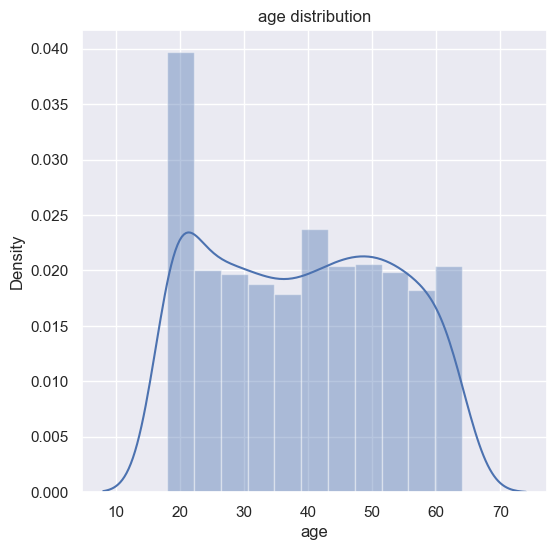

In [25]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

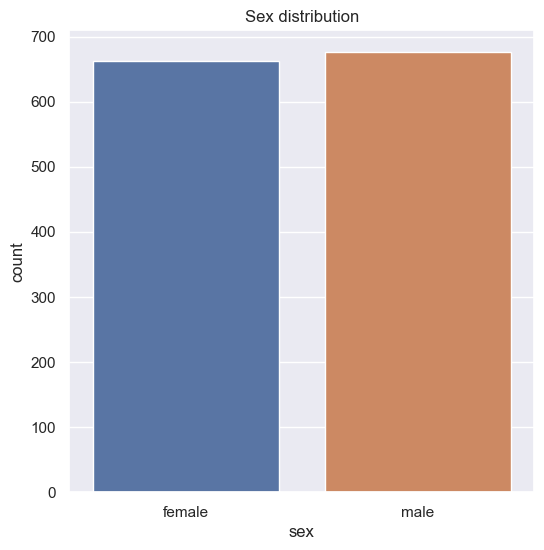

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex distribution')
plt.show()

In [29]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Gourvit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


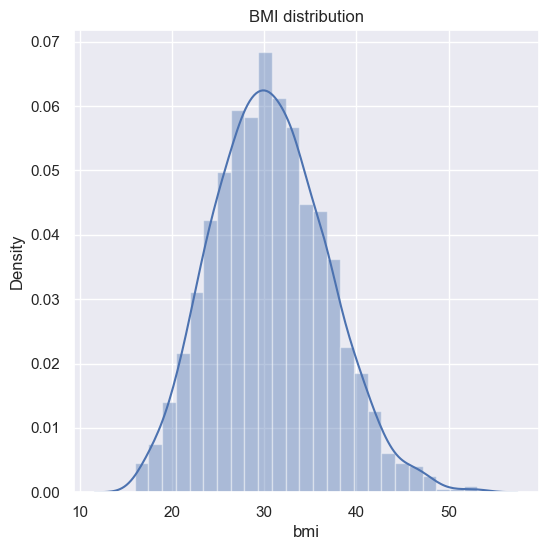

In [30]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

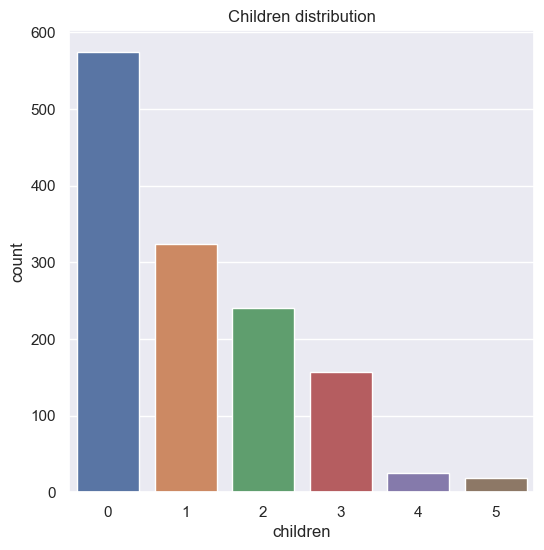

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children distribution')
plt.show()

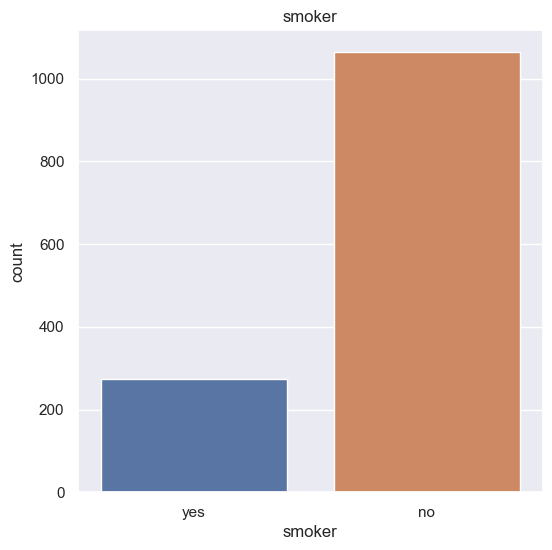

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

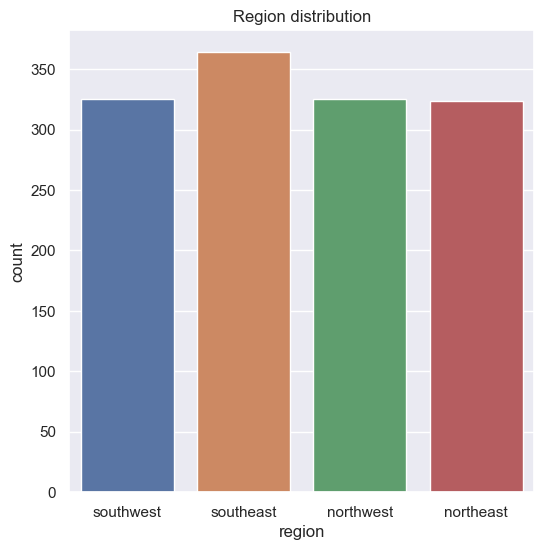

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region distribution')
plt.show()

C:\Users\Gourvit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


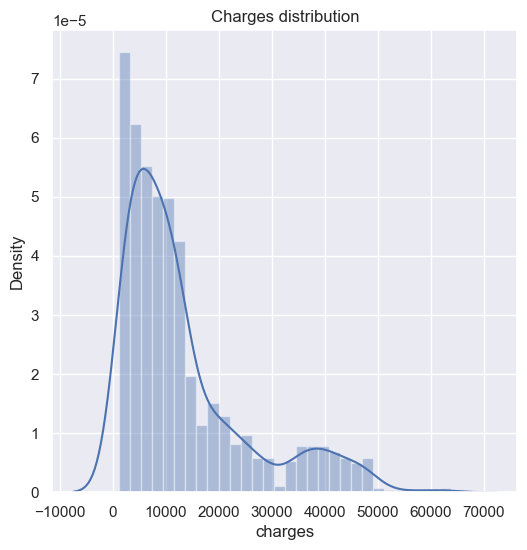

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges distribution')
plt.show()

In [39]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [41]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [44]:
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [50]:
x=df.drop(columns='charges',axis=1)

In [51]:
y=df['charges']

In [52]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,1
1336,21,1,25.800,0,1,0


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(x_train,y_train)

LinearRegression()

In [62]:
prediction = regressor.predict(x_train)

In [63]:
r2_score = metrics.r2_score?

In [ ]:
r2_score = metrics.r2_score

In [64]:
r2_score = metrics.r2_score(y_train,prediction)

In [65]:
r2_score

0.7519923667088932

In [66]:
prediction_test = regressor.predict(x_test)

In [67]:
r2_score_test = metrics.r2_score(y_test,prediction_test)

In [68]:
r2_score_test

0.7445422986536503